In [1]:
import tensorflow as tf
from tensorflow import keras
import os
from keras import utils, datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [17]:
data = tf.keras.utils.image_dataset_from_directory('C:\\Users\\maxch\\nsdc_fall_2024\\data')
resize_fn = keras.layers.Resizing(256, 256)

# resize images to 256 x 256
data = data.map(lambda x,y: (resize_fn(x), y))

# create training, validation, and testing sets
train_size = int(len(data) * 0.75)
val_size = int(len(data) * 0.15)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Found 2897 files belonging to 6 classes.


In [ ]:
# check for class imbalances 
labels_iterator= train.unbatch().map(lambda image, label: label).as_numpy_iterator()
class_names = {0:"boa", 1:"coluber_constrictor", 2:"copperhead", 3:'coral_snake', 4:'milk_snake',
               5:'pit_viper', 6:'rattlesnake', 7:'ribbon_snake', 8:'watersnake', 9:'yellow_eyelash_viper'}
labels = []
for label in labels_iterator:
    labels.append(label)

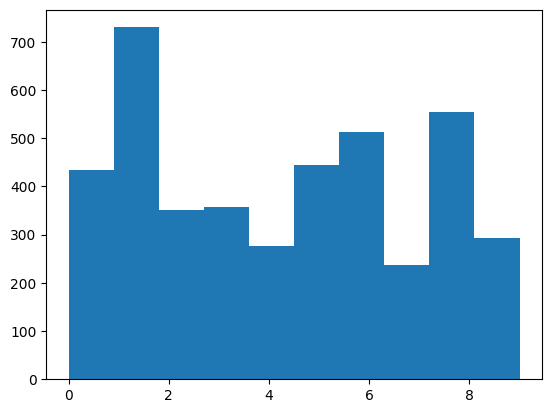

In [ ]:
plt.hist(labels)
plt.show()

In [15]:
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(i)
preprocessor = keras.Model(inputs = i, outputs = x)

In [16]:
model3 = models.Sequential([
    preprocessor,
    
    # augmentation layers to prevent overfitting by adding some noise to the data set
    layers.RandomFlip("horizontal", input_shape=(256, 256, 3)),
    layers.RandomRotation(0.15),

    # convolutional layers + maxpooling
    layers.Conv2D(32, kernel_size = (2, 2), strides = (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (2, 2), strides = (2, 2), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size = (2, 2), strides = (2, 2), activation='relu'),

    layers.Flatten(),

    # dense layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

model3.summary()

c:\Users\maxch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_6 (Functional)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_5 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,302,693 (16.41 MB)

 Trainable params: 4,302,693 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Assuming you have train_ds and validation datasets
history_model3 = model3.fit(train,
                            epochs=10,
                            validation_data=val)

Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - accuracy: 0.2554 - loss: 1.8105 - val_accuracy: 0.4159 - val_loss: 1.4664
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 339ms/step - accuracy: 0.4001 - loss: 1.4650 - val_accuracy: 0.4832 - val_loss: 1.3346
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - accuracy: 0.4686 - loss: 1.3329 - val_accuracy: 0.5240 - val_loss: 1.2350
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.5129 - loss: 1.2320 - val_accuracy: 0.5889 - val_loss: 1.0747
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 530s 7s/step - accuracy: 0.5610 - loss: 1.1389 - val_accuracy: 0.5240 - val_loss: 1.2500
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.6034 - loss: 1.0053 - val_accuracy: 0.5601 - val_loss: 1.1806
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 44s 347ms/step - accuracy: 0.6359 - loss: 0.9807 - val_accuracy: 0.5817 - val_loss: 1.1475
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 325ms/step - accuracy: 0.6696 - loss: 0.8817 - val_accura

In [ ]:
# show the training accuracy versus validation accuracy over time (epochs)
plt.plot(history_model3.history['accuracy'], label='Training Accuracy')
plt.plot(history_model3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model 3')
plt.legend()
plt.show()

In [19]:
# this model uses a base model (EfficientNetB0) that has been pre-trained.
IMG_SHAPE = (256, 256, 3)
base_model = keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               classes = range(52, 69))
# For MobileNetV2: alpha = 1.4
base_model.trainable = False

i = keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = keras.Model(inputs = i, outputs = x)

model4 = models.Sequential([
    # augmentation layers
    layers.RandomFlip("horizontal", input_shape=IMG_SHAPE),
    layers.RandomFlip("vertical", input_shape=IMG_SHAPE),
    
    base_model_layer,
    layers.GlobalAveragePooling2D(),
    
    #layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'),  # outputs the final classification
])

c:\Users\maxch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Assuming you have train_ds and validation datasets
history_model4 = model4.fit(train,
                            epochs=8,
                            validation_data=val)

Epoch 1/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7380 - loss: 0.8333 - val_accuracy: 0.9543 - val_loss: 0.1491
Epoch 2/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9405 - loss: 0.1748 - val_accuracy: 0.9591 - val_loss: 0.1211
Epoch 3/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9552 - loss: 0.1269 - val_accuracy: 0.9712 - val_loss: 0.0876
Epoch 4/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9681 - loss: 0.0958 - val_accuracy: 0.9615 - val_loss: 0.1005
Epoch 5/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9707 - loss: 0.0831 - val_accuracy: 0.9688 - val_loss: 0.0735
Epoch 6/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9742 - loss: 0.0761 - val_accuracy: 0.9591 - val_loss: 0.1060
Epoch 7/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9789 - loss: 0.0657 - val_accuracy: 0.9736 - val_loss: 0.0891
Epoch 8/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9812 - loss: 0.0561 - val_accuracy: 0.9639 - val_loss: 0.114

In [22]:
test_loss, test_accuracy = model4.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.9695 - loss: 0.1186
Test Accuracy: 97.57%
